In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Check the folder contents
os.listdir("/content/drive/MyDrive/archive (7)")


['car data.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/archive (7)/car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Understand the Data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#Basic Data Cleaning
#Drop car name (not useful for regression)
df = df.drop(columns=['Car_Name'], errors='ignore')

In [ ]:
#Encode Categorical Columns
df.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [ ]:
encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
#Feature–Target Split
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [ ]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Train Model 1 — Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [ ]:
#Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

Linear Regression Performance
MAE: 1.2219323621753906
RMSE: 1.8792498207978254
R2 Score: 0.8466902419663818


##Train Model 2 — Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [ ]:
#Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)

Random Forest Performance
MAE: 0.6211081967213116
RMSE: 0.9312403329457533
R2 Score: 0.9623535249586976


##Model Comparison Table

In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

comparison_df

,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.221932,1.87925,0.846690
1,Random Forest,0.621108,0.93124,0.962354


#Plots for regression

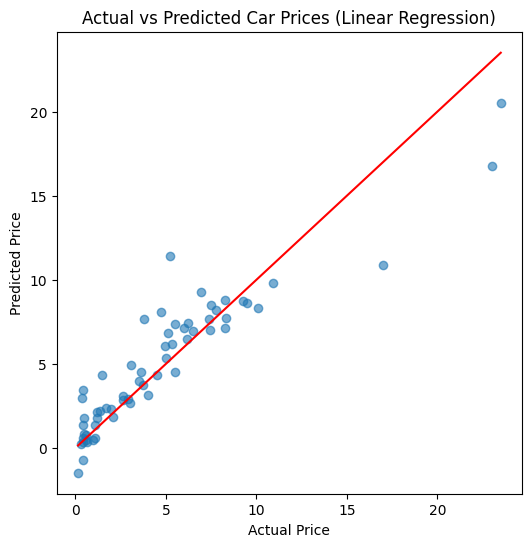

In [ ]:
#Plot 1: Actual vs Predicted Prices (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.show()


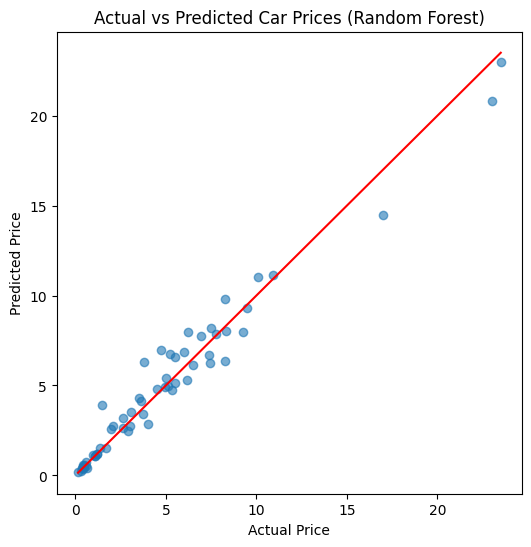

In [ ]:
#Plot 1: Actual vs Predicted Prices (Random Forest Regression)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.show()

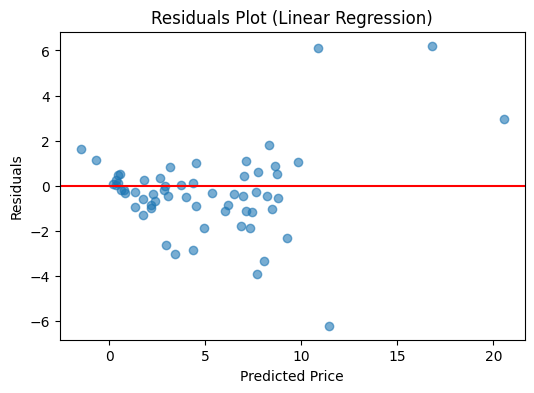

In [ ]:
#Plot 2: Residuals Plot for LINEAR REGRESSION
residuals = y_test - y_pred_lr

plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals, alpha=0.6)
plt.axhline(0, color='red')

plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Linear Regression)")
plt.show()


##Feature Importance

In [ ]:
#Plot 3:Feature Importance-Random Forest only
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp


,Feature,Importance
1,Present_Price,0.879114
0,Year,0.061026
2,Driven_kms,0.037124
5,Transmission,0.012367
3,Fuel_Type,0.006441
4,Selling_type,0.002714
6,Owner,0.001213


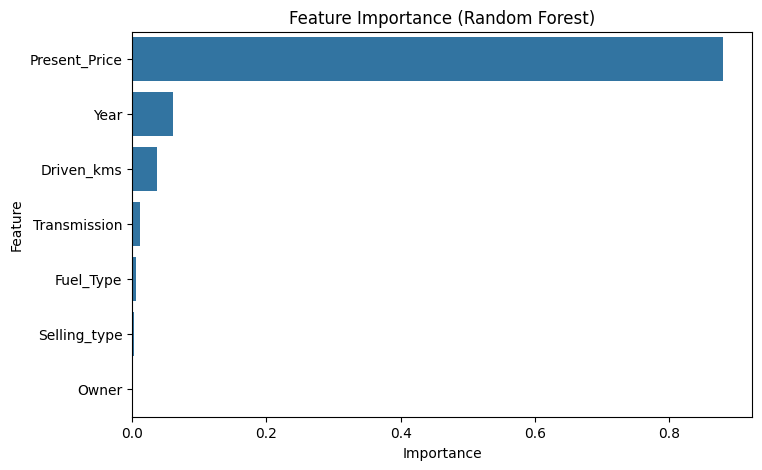

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_importance,
    x="Importance",
    y="Feature"
)
plt.title("Feature Importance (Random Forest)")
plt.show()


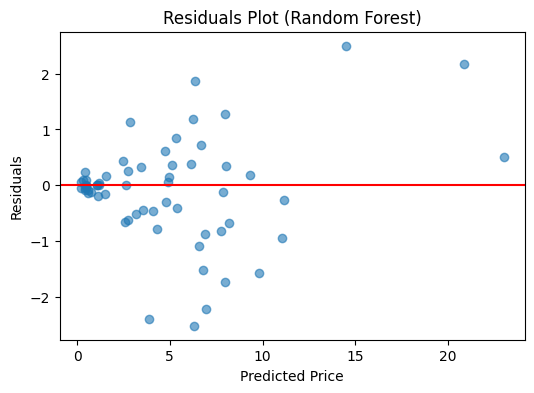

In [ ]:
#Plot 2: Residuals Plot for RANDOM FOREST
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Random Forest)")
plt.show()

In this project, machine learning models were used to forecast car prices using a variety of features.

**Random Forest** Regression achieved greater accuracy and reduced prediction errors than **Linear Regression**.

The findings show how well ensemble models handle non-linear relationships in actual pricing data.

##SHAP FOR TASK 3

In [ ]:
!pip install shap

In [ ]:
# Recreate unscaled train-test data for SHAP
X_unscaled = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_unscaled, y, test_size=0.2, random_state=42
)

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(rf, X_train_u)

# Calculate SHAP values
shap_values = explainer(X_test_u)

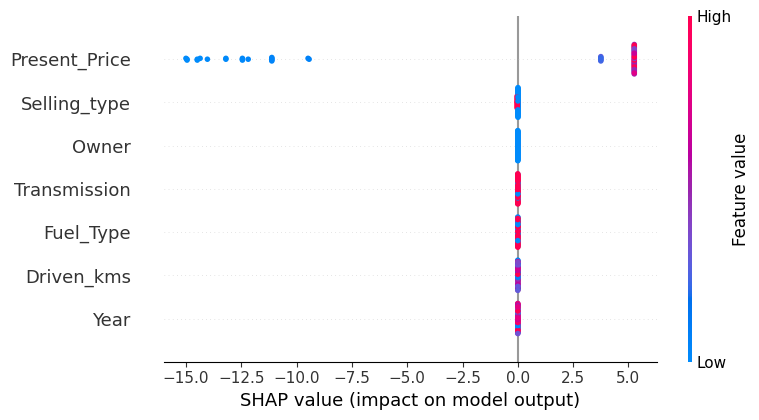

In [ ]:
shap.summary_plot(shap_values, X_test_u)

##**SHAP Interpretation**: Car Price Prediction

According to the SHAP analysis, the most important factor in predicting the selling price of a car is the current market price.

Fuel type, transmission, ownership history, and selling type are additional crucial characteristics.

The outcomes confirm that the model captures significant pricing patterns and are consistent with real-world expectations.